<a href="https://colab.research.google.com/github/Omar-Rashdan20/LangGraph_concept/blob/main/LangGraph_v1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is LangGraph?  


LangGraph is a powerful framework designed to help developers build intelligent AI agents that can think, plan, and act on your behalf. At its core, LangGraph allows you to break down complex tasks into smaller, manageable steps, organize these steps logically, and connect them like a roadmap using something called **graphs**. These graphs visually represent the flow of tasks, making it easy to see how each step is connected and in what order they should be executed.  

Think of LangGraph as a toolkit for creating smart assistants. These assistants don’t just follow instructions—they understand what you want, figure out the best way to achieve it, and carry out the tasks automatically. By using LangGraph, you can design AI systems that are structured, adaptable, and capable of handling everything from simple workflows to complicated problem-solving tasks.


### Why LangGraph?  

LangGraph offers unique advantages for building intelligent AI agents, especially when compared to frameworks such as LangChain. One of its standout features is the ability to create **cyclic graphs** in addition to Directed Acyclic Graphs (DAGs). Here's why that matters:  

1. **Support for Cyclic Graphs:**  
   Although tools such as LangChain are limited to DAGs—where tasks must follow a strict, linear flow without loops—LangGraph allows for **cyclic graphs**, where tasks can revisit earlier steps. This is crucial for workflows that require iterative processes, feedback loops, or retries.

   For example:  
   - An AI agent analyzing customer feedback might revisit earlier steps to refine its understanding based on new data.  
   - A process for refining a document might loop through draft, review, and revise steps multiple times.

3. **Enhanced Workflow Flexibility:**  
   Cyclic graphs make LangGraph ideal for real-world scenarios where tasks don’t always follow a one-way path. It can handle dynamic workflows where agents need to adapt, reevaluate, or repeat steps as needed, providing greater flexibility.  

4. **Powerful Iterative Processes:**  
   By enabling loops, LangGraph supports processes such as optimization, data refinement, or real-time adjustments, ensuring the AI agent delivers more accurate and meaningful results.  

5. **All-in-One Solution:**  
   LangGraph doesn’t just manage tasks but also integrates the benefits of both DAGs (for structured flows) and cyclic graphs (for iterative workflows). This makes it a more versatile framework for designing intelligent, adaptable AI agents.  

With LangGraph, you’re not constrained by one-way task flows. Its support for cyclic graphs allows you to model more complex, real-world problems with ease, making it a go-to choice for AI development.  


----


### Installing Required Libraries


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
%pip install -q langgraph==0.2.57 langchain-google-genai

### Importing Required Libraries


In [ ]:
from langgraph.graph import StateGraph

In [ ]:
from google.colab import userdata
import os

os.environ["GOOGLE_API_KEY"] = userdata.get("gemini_api")

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="models/gemini-2.5-flash",

)

response = llm.invoke("Hello")
print(response.content)

Hello! How can I help you today?


## Components of LangGraph  

LangGraph’s strength lies in its structured and intuitive design, composed of essential building blocks that enable the creation of intelligent AI agents, with default stages denoting start and end of workflow.


In this example, we are defining a state structure for a **user authentication workflow**. The state, called `AuthState`, is a typed dictionary that holds information about a user's credentials (username and password) and their authentication status (`is_authenticated`) as shown here:


### **1. States**  
States represent the **current condition or context** within a workflow. They store and manage information as the agent progresses from one node to the next.

For instance:  
- A state might capture user input, store the results of a database query, or reflect the status of an ongoing process.  

States ensure the AI agent has access to relevant information at the right time, enabling dynamic and context-aware behavior.

#### Example: Class Description - `AuthState`  
Using `from typing import TypedDict, Optional`, the `AuthState` class is defined as a `TypedDict` that specifies the structure of a dictionary representing a user's authentication state. Each key has a specific type, and all fields are optional (`Optional`), meaning they can either hold a value of the specified type or be `None`.

#### State Keys and Types:
- **`username`**: `Optional[str]` - The user's username; it can be a string or `None`.
- **`password`**: `Optional[str]` - The user's password; it can be a string or `None`.
- **`is_authenticated`**: `Optional[bool]` - Indicates whether the user is authenticated; it can be a boolean or `None`.
- **`output`**: `Optional[str]` - A message or result related to authentication; it can be a string or `None`.

This structure ensures that the authentication state is consistently defined and type-safe, while also accommodating scenarios where some fields may be unavailable or unused.


In [ ]:
from typing import TypedDict, Optional

class AuthState(TypedDict):
    username: Optional[str]
    password: Optional[str]
    is_authenticated: Optional[bool]
    output: Optional[str]

### **Example Objects and Their States**

#### **Object 1: Successful Login**
Here is an example of the  ```AuthState ``` object  with a successful login:


In [ ]:
auth_state_1: AuthState = {
    "username": "alice123",
    "password": "123",
    "is_authenticated": True,
    "output": "Login successful."
}
print(f"auth_state_1: {auth_state_1}")

auth_state_1: {'username': 'alice123', 'password': '123', 'is_authenticated': True, 'output': 'Login successful.'}


#### Object 2: Unsuccessful Login
Here is an example of the  ```AuthState ``` object with an unsuccessful login:


In [ ]:
auth_state_2: AuthState = {
    "username":"",
    "password": "wrongpassword",
    "is_authenticated": False,
    "output": "Authentication failed. Please try again."
}
print(f"auth_state_2: {auth_state_2}")

auth_state_2: {'username': '', 'password': 'wrongpassword', 'is_authenticated': False, 'output': 'Authentication failed. Please try again.'}


This state serves as the backbone for workflows involving user authentication. It will be passed between nodes in a graph to validate the credentials and update the `is_authenticated` field accordingly.


### **2. Nodes**  
Nodes are the **core units of action** in LangGraph. Each node represents a specific task or operation that the AI agent needs to perform.

For example:  
- A node could fetch data from an API, process information, or generate a response.  

Nodes can vary in complexity, from simple calculations to executing intricate workflows, and they form the foundation of any graph in LangGraph.  


#### Defining the Input Node



Now we define the `input_node`, which collects the user's username and password if they are not already provided in the state. This node ensures that the state is populated with the necessary input for authentication.

This node is usually the starting point in the graph, ensuring that the required input data is gathered before proceeding to the authentication step.


In [ ]:
def input_node(state):
    print(state)
    if state.get('username', "") =="":
        state['username'] = input("What is your username?")

    password = input("Enter your password: ")

    return {"password":password}

We pass in the first object with all the fields, and ```input_node``` prompts us for the password:


In [ ]:
input_node(auth_state_1)

{'username': 'alice123', 'password': '123', 'is_authenticated': True, 'output': 'Login successful.'}
Enter your password: 123


{'password': '123'}

In [ ]:
input_node(auth_state_2)

{'username': '', 'password': 'wrongpassword', 'is_authenticated': False, 'output': 'Authentication failed. Please try again.'}
What is your username?123
Enter your password: wrongpassword


{'password': 'wrongpassword'}

In this example, since there is no username provided, the function prompts us to enter one.


### Defining the Validate Credentials Node  


The node is a fundamental building block of a graph that encapsulates a unit of computation or functionality. It represents a single step in a workflow or process, typically taking input, performing an action, and providing output. Each node is connected to others to define the flow of logic or data.

For your example, the ```validate_credentials_node``` would function as a node in Langraph, performing the task of validating user credentials.

The `validate_credentials_node` takes the current state as input and is responsible for checking the user's credentials (username and password) provided in the state. Based on the validation, it updates the state with an `is_authenticated` value, indicating whether the authentication was successful or not. This node ensures that the validation result is added to the state, allowing the graph to determine the next step in the workflow based on whether the authentication was successful.


In [ ]:
def validate_credentials_node(state):
    # Extract username and password from the state
    username = state.get("username", "")
    password = state.get("password", "")

    print("Username :", username, "Password :", password)
    # Simulated credential validation
    if username == "test_user" and password == "secure_password":
        is_authenticated = True
    else:
        is_authenticated = False

    # Return the updated state with authentication result
    return {"is_authenticated": is_authenticated}


We can apply ```validate_credentials_node``` to two objects: one with an incorrect format and another with a correct format, to test its functionality.
### Incorrect Format


In [ ]:
validate_credentials_node(auth_state_1)

Username : alice123 Password : 123


{'is_authenticated': False}

### Correct Format


In [ ]:
auth_state_3: AuthState = {
    "username":"test_user",
    "password":  "secure_password",
    "is_authenticated": False,
    "output": "Authentication failed. Please try again."
}
print(f"auth_state_3: {auth_state_3}")

auth_state_3: {'username': 'test_user', 'password': 'secure_password', 'is_authenticated': False, 'output': 'Authentication failed. Please try again.'}


In [ ]:
validate_credentials_node(auth_state_3)

Username : test_user Password : secure_password


{'is_authenticated': True}

#### Defining the Success Node  



The `success_node` takes the current state as input and is triggered when the authentication process is successful. It returns a success message to indicate that the user has been authenticated.


In [ ]:
# Define the success node
def success_node(state):
    return {"output": "Authentication successful! Welcome."}

In [ ]:
success_node(auth_state_3)

{'output': 'Authentication successful! Welcome.'}

This node is connected in the graph to handle the flow when the user's credentials are validated successfully. It provides a positive outcome for the workflow.


#### Defining the Failure Node


The `failure_node` takes the current state as input and is triggered when the authentication process fails. It returns an output indicating the failure to authenticate.



In [ ]:
# Define the failure node
def failure_node(state):
    return {"output": "Not Successfull, please try again!"}

This node is connected in the graph to handle the flow when the user's credentials do not pass validation, providing feedback for the failed authentication attempt.


#### Defining the Router Node  


The `router` node acts as a decision-making point in the workflow. It takes the current state as input and determines the next node to execute based on the `is_authenticated` value in the state.


In [ ]:
def router(state):
    if state['is_authenticated']:
        return "success_node"
    else:
        return "failure_node"

This node ensures that the graph transitions to the appropriate node—either the success or failure node—based on whether the authentication was successful. It is an essential part of managing conditional logic in the workflow.


#### Creating the Graph  

To begin building the workflow, we need to create a graph that will serve as the foundation for connecting nodes and defining the application's logic. We create a new instance of `StateGraph` using our `AuthState` structure, which acts as a blueprint for the application's state. This graph will manage the flow of execution between nodes, ensuring a seamless and organized workflow.


In [ ]:
from langgraph.graph import StateGraph
from langgraph.graph import END

# Create an instance of StateGraph with the GraphState structure
workflow = StateGraph(AuthState)
workflow

#### Adding Nodes to the Graph  

Now, we add nodes to the graph to define the tasks and logic of the workflow. Nodes are added using the `add_node` method, which takes two arguments:  

1. **Node Name**: A unique string identifier for the node.  
2. **Node Function**: The function that will execute the logic for this node.  


To gather user input for authentication, we add the `input_node` to the graph using the `add_node` method. This node prompts the user to enter their username and password if they are not already present in the state.

- `"InputNode"`: This is the unique identifier for the input node.  
- `input_node`: The function that collects the username and password from the user and updates the state accordingly.  



In [ ]:
workflow.add_node("InputNode", input_node)


To handle the authentication logic, we add the `validate_credentials_node` to the graph using the `add_node` method. This node validates the username and password provided by the user and updates the state with the authentication result.


In [ ]:
workflow.add_node("ValidateCredential", validate_credentials_node)


Now, we add the `success_node` to the graph using the `add_node` method. This node will be triggered if the credentials are validated successfully, and it will return a success message.



In [ ]:
workflow.add_node("Success", success_node)


Next, we add the `failure_node` to the graph using the `add_node` method. This node will be triggered if the credentials are invalid, returning a failure message.




In [ ]:
workflow.add_node("Failure", failure_node)

### **3. Edges**  

Edges define the **connections between nodes** and represent the flow of execution within the graph. They dictate how the AI agent transitions from one task to another based on predefined logic or conditions. In the authentication workflow, edges guide the application flow, determining the path taken based on the results of each node's execution.

#### **Authentication Use Case Example**  
- **Input Node**: The edge flows from this node to the **Validate Credentials Node**, where the user input (username and password) is validated.  
- **Failure Node**: If authentication fails, the flow moves back to the **Input Node** to prompt the user to re-enter their credentials.
- **Success Node**: If authentication succeeds, the flow ends after providing a success message, indicating the successful completion of the authentication process.


#### Adding the Edge Between InputNode and ValidateCredential Node  

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/2M4XoL8bc2Em8o_0T9XQbg/Screenshot%202024-12-20%20at%204-19-46%E2%80%AFPM%20copy-mh%20-5-.png" alt="Screenshot" width="300">
</div>


To establish the connection between the `InputNode` and the `ValidateCredential` node, we use the `add_edge` method. This edge represents the flow from the user input phase to the credential validation phase, ensuring that once the user enters their details, the next step is to validate them.



In [ ]:
workflow.add_edge("InputNode", "ValidateCredential")



`add_edge(start, end)`: This method creates a directed edge between two nodes, defining the flow of execution from one node to another.
  - **`start`**: The node from which the flow begins. In this case, it's `"InputNode"`, where the user provides their credentials.
  - **`end`**: The node to which the flow leads. Here, it's `"ValidateCredential"`, where the credentials entered by the user are validated.



#### Adding the Edge Between Success Node and END  

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/8yOLvWWbyVbO8jdmSyEZGg/Screenshot%202024-12-20%20at%204-19-46%E2%80%AFPM%20copy-mh%20-6-.png" alt="Screenshot" width="300">
</div>


To define the flow of the application after successful authentication, we create an edge between the **Success Node** and the **END** node. This edge signifies the conclusion of the authentication process, marking the successful completion of the task.


In [ ]:
workflow.add_edge("Success", END)

#### Adding the Edge Between Failure Node and InputNode  

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/zixPBpM-2GP1I0_X4wCloA/Screenshot%202024-12-20%20at%204-19-46%E2%80%AFPM%20copy-mh%20-7-.png" alt="Screenshot" width="300">
</div>


In the case where the authentication fails, we want to allow the user to re-enter their credentials. To enable this flow, we create an edge between the **Failure Node** and the **InputNode**. This edge represents the transition back to the input phase so the user can attempt to authenticate again.


In [ ]:
workflow.add_edge("Failure", "InputNode")

### **4. Conditional Edges**  

Conditional edges enable **decision-making** by allowing transitions between nodes based on specific conditions within the state. These edges define the flow of execution based on outcomes such as user input, validation results, or any other predefined logic. By using conditional edges, the AI agent can dynamically choose its path based on the results of previous tasks.  

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/dcXTJEOQ8nhYh7AvVdW9Mw/Screenshot%202024-12-20%20at%204-19-46%E2%80%AFPM%20copy-mh%20-8-.png" alt="Screenshot" width="300">
</div>


### **Building an Authentication Workflow**

#### **Authentication Use Case Example**  
In our authentication flow, we can introduce conditional edges that determine whether the user successfully authenticated or not. These edges are used to decide the next step based on the authentication result.

- **Validate Credentials Node**: After validating the user credentials, the system uses a conditional edge to decide:
  - If `is_authenticated` is `True`, the flow moves to the **Success Node**.
  - If `is_authenticated` is `False`, the flow loops back to the **InputNode** so the user can try entering their credentials again.


In [ ]:
workflow.add_conditional_edges("ValidateCredential", router, {"success_node": "Success", "failure_node": "Failure"})

**`add_conditional_edges(start, router, conditions)`**: This method defines the conditional transitions from a given node.
  - **`start`**: The node where the conditional edges start (in this case, `"ValidateCredential"`).
  - **`router`**: A function that determines the condition. It checks the current state (like the `is_authenticated` status) and returns the appropriate node to transition to (either `"Success"` or `"Failure"`).
  - **`conditions`**: A dictionary that maps conditions (such as `"success_node"` or `"failure_node"`) to target nodes, indicating where to direct the flow based on the condition.


#### Setting the Entry Point  

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rxNr7amJUiaEyhZKYc-JFg/Screenshot%202024-12-20%20at%204-19-46%E2%80%AFPM%20copy-mh%20-9-.png" alt="Screenshot" width="300">
</div>


The **entry point** defines where the workflow starts. By setting an entry point, you're specifying the first node that the AI agent will execute when the workflow begins. In our authentication use case, we want the workflow to start at the **InputNode**, where the user will be prompted to enter their credentials.

By defining the entry point, we ensure the workflow initiates at the input phase, guiding the user through the authentication process step by step.


In [ ]:
workflow.set_entry_point("InputNode")

**`set_entry_point(node)`**: This method sets the starting point for the workflow.
  - **`node`**: The name of the node where the workflow will begin. In this case, `"InputNode"`, which ensures the agent prompts the user for their credentials before proceeding with the authentication process.


#### Compiling the Workflow  

Once all the nodes and edges are defined in the workflow, the next step is to compile it. Compiling the workflow transforms the defined nodes, edges, and logic into a ready-to-use application that can execute the defined tasks sequentially or conditionally, as per the graph's structure.


In [ ]:
app = workflow.compile()

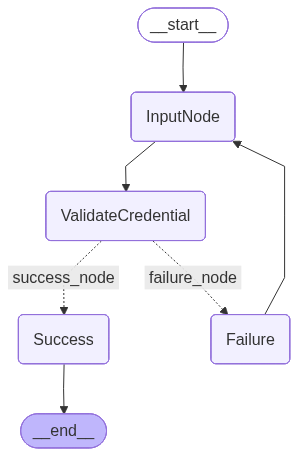

In [ ]:

try:
    from IPython.display import Image, display
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Graph visualization skipped:", e)



#### Running the Application  

Once the workflow is compiled, we can run it by invoking the application with the required inputs. The `invoke` method takes an initial state (a dictionary of input values) and starts execution from the entry point defined in the workflow.

<p style='color: red'><b>Note:</b> The correct password is <code>secure_password</code>, so make sure to enter that to authenticate successfully.</p>


In [ ]:
inputs = {"username": "test_user"}
result = app.invoke(inputs)
print(result)

{'username': 'test_user'}
Enter your password: 123
Username : test_user Password : 123
{'username': 'test_user', 'password': '123', 'is_authenticated': False, 'output': 'Not Successfull, please try again!'}
Enter your password: sucsess_password
Username : test_user Password : sucsess_password
{'username': 'test_user', 'password': 'sucsess_password', 'is_authenticated': False, 'output': 'Not Successfull, please try again!'}
Enter your password: secure_password
Username : test_user Password : secure_password
{'username': 'test_user', 'password': 'secure_password', 'is_authenticated': True, 'output': 'Authentication successful! Welcome.'}


Now we are printing the output by accessing the `output` key from the result of the workflow execution.


In [ ]:
result['output']

'Authentication successful! Welcome.'

#### **How These Components Work Together**  

LangGraph combines these components into a cohesive framework:  
1. **Nodes** perform actions based on their defined functionality.  
2. **States** carry data that nodes use and update.  
3. **Edges** ensure smooth execution by connecting nodes in a logical order.  
4. **Conditional Edges** add intelligence by enabling decision-making and dynamic workflows.


### **Building a QA Workflow Specific to the Guided Project**

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/BgP-ruk_KS5H8D7iISsJ6A/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM.png" alt="Screenshot" width="150">
</div>


Now, we are designing a **Question-Answering (QA) workflow** specifically tailored for a guided project. This workflow leverages LangGraph to create modular, state-driven transitions and ensures that questions related to the guided project are prioritized and handled effectively.

The workflow evaluates whether a user’s query is relevant to the guided project (for example, what is this guided project about? or what is LangGraph?). For relevant questions, it uses predefined context to generate an informed response. If the query is unrelated to the guided project, the workflow explicitly communicates that there isn’t enough context to provide an answer, ensuring clarity and transparency in interactions.

---

### **Workflow Description**

1. **Input Validation Node**  
   - **Purpose**: Ensures the user has entered a valid question.  
   - **Flow**: If the input is valid, it proceeds to evaluate the query’s relevance; otherwise, it terminates with an error message.

2. **Context Provider Node**  
   - **Purpose**: Checks whether the question is specific to the guided project.  
     - For relevant questions, it provides predefined project-specific context.  
     - For unrelated questions, it sets the context to `null`.  
   - **Flow**: Always transitions to the question-answering step, whether or not context is available.

3. **LLM Question-Answering Node**  
   - **Purpose**: Uses the context (if available) to answer the question.  
     - If context is provided, it generates a detailed response.  
     - If context is `null`, it responds with: *"I don't have enough context to answer your question. Please ask about the guided project."*


### Defining the State for the QA Workflow

Now, we are defining the **state** for our **Question-Answering (QA) workflow** using the `QAState` TypedDict. This state will be used to store and manage the data as the workflow progresses, including the user's question, the relevant context (if any), and the generated answer.

This state structure will allow us to keep track of:
- **`question`**: The user's input that will be evaluated to determine if it’s related to the guided project.
- **`context`**: The context provided about the guided project, which will help the system generate a more relevant answer. If the question isn't related to the project, this will be `None`.
- **`answer`**: The response generated by the LLM, which will depend on the context and the user's question.
  
In this case the context is :


**`This guided project is about using LangGraph, a Python library to design state-based workflows. LangGraph simplifies building complex applications by connecting modular nodes with conditional edges.`**


In [ ]:
# Define the structure of the QA state
class QAState(TypedDict):
    # 'question' stores the user's input question. It can be a string or None if not provided.
    question: Optional[str]

    # 'context' stores relevant context about the guided project, if the question pertains to it.
    # If the question isn't related to the project, this will be None.
    context: Optional[str]

    # 'answer' stores the generated response or answer. It can be None until the answer is generated.
    answer: Optional[str]

To return an example object:


In [ ]:
# Create an example object
qa_state_example = QAState(
    question="What is the purpose of this guided project?",
    context="This project focuses on building a chatbot using Python.",
    answer=None
)

# Print the attributes
for key, value in qa_state_example.items():
    print(f"{key}: {value}")

question: What is the purpose of this guided project?
context: This project focuses on building a chatbot using Python.
answer: None


#### **Defining the Input Validation Node**

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QNWh9LRDo4A3uF5cz4bXcQ/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh.png" alt="Screenshot" width="150">
</div>


In this node, we validate the user's input (the question). The node checks whether the question is provided and if it's not empty. If the question is empty, it returns an error message indicating that the question cannot be empty. If the question is valid, it proceeds to the next node.


In [ ]:
def input_validation_node(state):
    # Extract the question from the state, and strip any leading or trailing spaces
    question = state.get("question", "").strip()

    # If the question is empty, return an error message indicating invalid input
    if not question:
        return {"valid": False, "error": "Question cannot be empty."}

    # If the question is valid, return valid status
    return {"valid": True}

If the question is valid, it returns a valid status:


In [ ]:
input_validation_node(qa_state_example)

{'valid': True}

#### **Defining the Context Provider**

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/htDP3RKH9b6X1NHSKME-YQ/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh%20-1-.png" alt="Screenshot" width="150">
</div>


This node checks if the question is related to the guided project. If it mentions "LangGraph" or "guided project," it provides the relevant context. Otherwise, it sets the context to `None':


In [ ]:
def context_provider_node(state):
    question = state.get("question", "").lower()
    # Check if the question is related to the guided project
    if "langgraph" in question or "guided project" in question:
        context = (
            "This guided project is about using LangGraph, a Python library to design state-based workflows. "
            "LangGraph simplifies building complex applications by connecting modular nodes with conditional edges."
        )
        return {"context": context}
    # If unrelated, set context to null
    return {"context": None}

#### **Integrating LLM for QA Workflow**  

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Djs-AScfvwE8fnKButiPXg/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh%20-2-.png" alt="Screenshot" width="150">
</div>


In this step, we are building a node that utilizes an LLM (Large Language Model) to answer user questions based on the provided context. If the question is unrelated to the guided project, the node handles this gracefully by returning a predefined response. This approach uses Google's Gemini model through LangChain's `ChatGoogleGenerativeAI` interface.


In [ ]:
def llm_qa_node(state):
    # Extract the question and context from the state
    question = state.get("question", "")
    context = state.get("context", None)

    # Check for missing context and return a fallback response
    if not context:
        return {"answer": "I don't have enough context to answer your question."}

    # Construct the prompt dynamically
    prompt = f"Context: {context}\nQuestion: {question}\nAnswer the question based on the provided context."

    # Use LangChain's ChatGoogleGenerativeAI to get the response
    try:
        response = llm.invoke(prompt)
        return {"answer": response.content.strip()}
    except Exception as e:
        return {"answer": f"An error occurred: {str(e)}"}

#### **Creating the QA Workflow Graph**  
In this step, we initialize the **state-based graph** for our QA workflow. We use the `StateGraph` class to define a graph that will handle user questions, provide context if available, and generate answers using an LLM.


In [ ]:
qa_workflow = StateGraph(QAState)

Now, we add the **`InputNode`** to the QA workflow. This node is responsible for validating whether the user-provided question is non-empty and properly formatted.


In [ ]:
qa_workflow.add_node("InputNode", input_validation_node)

Now, we add the **`ContextNode`** to the QA workflow. This node determines whether the question is related to the guided project and provides relevant context accordingly.


In [ ]:
qa_workflow.add_node("ContextNode", context_provider_node)

Now, we add the **`QANode`** to the QA workflow. This node leverages an LLM (Google's Gemini 1.5 Flash) to answer questions based on the provided context.


In [ ]:
qa_workflow.add_node("QANode", llm_qa_node)

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/0K3mU7FSZFw0tnAXiN22ag/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh%20-3-.png" alt="Screenshot" width="150">
</div>


Now, we set the **entry point** for our QA workflow to the **`InputNode`**. This is the first node that will be executed when the workflow starts, ensuring that the user's input is validated before any other operations occur.


In [ ]:
qa_workflow.set_entry_point("InputNode")

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VFdsfj9Q26M9z45QilEVrQ/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh%20-4-.png" alt="Screenshot" width="150">
</div>


In this step, we define the connection or **edge** between the **`InputNode`** and the **`ContextNode`**. This means that after the user input is validated by the **`InputNode`**, the workflow will automatically transition to the **`ContextNode`** to determine whether additional context is needed for the question.


In [ ]:
qa_workflow.add_edge("InputNode", "ContextNode")

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/kd4OXfGZ4oQeTipTjIq6GQ/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh%20-5-.png" alt="Screenshot" width="150">
</div>


Now, we define the connection or **edge** between the **`ContextNode`** and the **`QANode`**. Once the **`ContextNode`** has determined whether there is context available for the question, the workflow will transition to the **`QANode`** to provide the answer based on the question and the context.


In [ ]:
qa_workflow.add_edge("ContextNode", "QANode")

<div style="text-align: center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZBynpO0vyZbUD3fzWVc6LQ/Screenshot%202024-12-20%20at%204-20-07%E2%80%AFPM-mh%20-6-.png" alt="Screenshot" width="150">
</div>


Now, we define the final edge in our workflow. After the **`QANode`** has generated an answer based on the context and the user's question, we move to the **`END`** node, which represents the completion of the workflow.


In [ ]:
qa_workflow.add_edge("QANode", END)

Now that we've added the nodes and edges, we can compile the workflow using the `compile()` method. This converts the workflow into an executable application that processes input data and follows the defined flow.


In [ ]:
qa_app = qa_workflow.compile()

#### Ask an Irrelevant Question
Now, we can invoke the compiled QA workflow by passing in an irrelevant question. The system will process this question and move through the nodes. Since the question is unrelated to the guided project, the system will provide a response indicating that it doesn't have enough context.


In [ ]:
qa_app.invoke({"question": "What is the weather today?"})

{'question': 'What is the weather today?',
 'context': None,
 'answer': "I don't have enough context to answer your question."}

#### Ask Relevant Question


Next, we ask a relevant question related to the guided project. The system will use the provided context about LangGraph and respond with an answer based on the relevant information.


In [ ]:
qa_app.invoke({"question": "What is LangGraph?"})

{'question': 'What is LangGraph?',
 'context': 'This guided project is about using LangGraph, a Python library to design state-based workflows. LangGraph simplifies building complex applications by connecting modular nodes with conditional edges.',
 'answer': 'LangGraph is a Python library used to design state-based workflows. It simplifies building complex applications by connecting modular nodes with conditional edges.'}

In [ ]:
qa_app.invoke({"question": "What is the best guided project?"})

{'question': 'What is the best guided project?',
 'context': 'This guided project is about using LangGraph, a Python library to design state-based workflows. LangGraph simplifies building complex applications by connecting modular nodes with conditional edges.',
 'answer': 'Based on the provided context, the information does not specify what the "best" guided project is. It only describes **one specific guided project** about using LangGraph to design state-based workflows.'}